# Analisis Exploratorio Global Electronics

## Introduccion
Este proyecto consiste en un Jupyter Notebook que aborda el Analisis Exploratorio de Datos (EDA). El cuaderno esta organizado en celdas que incluyen tanto codigo como documentacion, lo que facilita la comprension de los pasos realizados, desde la carga y limpieza de datos hasta su analisis y visualizacion. Esta disenado para que tanto principiantes como expertos en analisis de datos puedan entender y replicar el flujo de trabajo.


## Metodologia

En esta seccion se describen las tecnicas y herramientas utilizadas para llevar a cabo el analisis de datos.

### Recoleccion de Datos
- **Fuentes:** Datos de Global Electronics.

### Procesamiento y Limpieza
- **Preprocesamiento:** Se cambio el tipo de dato de columnas especificas para asegurar una correcta interpretacion y analisis. Ademas, se eliminaron datos duplicados para mejorar la calidad del dataset.
- **Herramientas:** Se utilizaron librerias como `pandas` para la manipulacion y transformacion de los datos.

### Analisis y Modelado
- **Tecnicas:** Se aplico analisis exploratorio de datos y visualizaciones.
- **Herramientas y Librerias:** Se utilizaron `matplotlib`/`seaborn` para la visualizacion.


In [ ]:
# Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  ttest_ind, chi2_contingency,zscore, ttest_1samp,wilcoxon, kruskal, f_oneway, mannwhitneyu 
from statsmodels.tsa.seasonal import seasonal_decompose

### Recolección de Datos
- **Fuentes:** Datos de Global Electronics.

In [2]:
# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Cargo el el archivo csv agrupado en SQL
df = pd.read_csv('Finalfinal.csv')
df.head()

,Order Number,CustomerKey,CustomerName,Gender,Birthday,StateCustomers,CountryCustomers,ProductKey,Product Name,CategoryKey,StoreKey,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category,CountryStore,StateStore,Quantity,SalesAmount,Order Date,Currency Code,Open Date
0,367006,693285,Solaine Lanoie,Female,1978-11-20,Mayotte,France,2445,Litware 80mm Dual Ball Bearing Case Fan E1001 ...,8,18,Litware,2.54,4.99,Fans,Home Appliances,France,Mayotte,3,14.97,2016-01-02,EUR,2012-08-08
1,367008,763246,Remigio Romano,Male,1942-07-17,Milano,Italy,1951,Litware Refrigerator 24.7CuFt X980 Silver,8,28,Litware,1060.22,3199.99,Refrigerators,Home Appliances,Italy,Caltanissetta,3,9599.97,2016-01-02,EUR,2012-12-15
2,367023,129318,Victoria Courtney,Female,1976-08-08,New South Wales,Australia,1139,"Fabrikam SLR Camera 35"" M358 Orange",4,2,Fabrikam,150.84,328.00,Digital SLR Cameras,Cameras and camcorders,Australia,Northern Territory,5,1640.00,2016-01-02,AUD,2008-01-12
3,367023,129318,Victoria Courtney,Female,1976-08-08,New South Wales,Australia,1031,A. Datum Ultra Compact Digital Camera M190 Azure,4,2,A. Datum,75.88,165.00,Digital Cameras,Cameras and camcorders,Australia,Northern Territory,2,330.00,2016-01-02,AUD,2008-01-12
4,369006,734605,Lorna Longo,Female,1965-11-26,Pavia,Italy,654,Proseware Ink Jet Wireless All-In-One Printer ...,3,28,Proseware,59.32,129.00,"Printers, Scanners & Fax",Computers,Italy,Caltanissetta,1,129.00,2016-01-04,EUR,2012-12-15


In [3]:
# Creo una copia de DataFrame
df_copy = df.copy()

In [4]:
# Observo tipos de datos de todas las columnas
df.dtypes

Order Number          int64
CustomerKey           int64
CustomerName         object
Gender               object
Birthday             object
StateCustomers       object
CountryCustomers     object
ProductKey            int64
Product Name         object
CategoryKey           int64
StoreKey              int64
Brand                object
Unit Cost USD       float64
Unit Price USD      float64
Subcategory          object
Category             object
CountryStore         object
StateStore           object
Quantity              int64
SalesAmount         float64
Order Date           object
Currency Code        object
Open Date            object
dtype: object

In [5]:
# Resumen estadístico
df.describe()

,Order Number,CustomerKey,ProductKey,CategoryKey,StoreKey,Unit Cost USD,Unit Price USD,Quantity,SalesAmount
count,6.288400e+04,6.288400e+04,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,1.180797e+06,1125.859344,4.469611,31.802144,116.253013,280.569848,3.144790,886.640156
std,4.532963e+05,5.859634e+05,709.244010,2.132682,22.978188,140.033327,382.827515,2.256371,1648.480286
min,3.660000e+05,3.010000e+02,1.000000,1.000000,0.000000,0.480000,0.950000,1.000000,0.950000
25%,1.121017e+06,6.808580e+05,437.000000,3.000000,8.000000,22.050000,47.950000,1.000000,115.000000
50%,1.498016e+06,1.261200e+06,1358.000000,5.000000,37.000000,79.530000,181.000000,2.000000,360.000000
75%,1.788010e+06,1.686496e+06,1650.000000,6.000000,53.000000,138.420000,300.000000,4.000000,969.000000
max,2.243032e+06,2.099937e+06,2517.000000,8.000000,66.000000,1060.220000,3199.990000,10.000000,31999.900000


In [6]:
# Información detallada del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      62884 non-null  int64  
 1   CustomerKey       62884 non-null  int64  
 2   CustomerName      62884 non-null  object 
 3   Gender            62884 non-null  object 
 4   Birthday          62884 non-null  object 
 5   StateCustomers    62884 non-null  object 
 6   CountryCustomers  62884 non-null  object 
 7   ProductKey        62884 non-null  int64  
 8   Product Name      62884 non-null  object 
 9   CategoryKey       62884 non-null  int64  
 10  StoreKey          62884 non-null  int64  
 11  Brand             62884 non-null  object 
 12  Unit Cost USD     62884 non-null  float64
 13  Unit Price USD    62884 non-null  float64
 14  Subcategory       62884 non-null  object 
 15  Category          62884 non-null  object 
 16  CountryStore      62884 non-null  object

---

## Procesamiento y Limpieza
- **Preprocesamiento:** Se cambió el tipo de dato de columnas específicas para asegurar una correcta interpretación y análisis. Además, se eliminaron datos duplicados para mejorar la calidad del dataset.
- **Herramientas:** Se utilizaron librerías como `pandas` para la manipulación y transformación de los datos.

In [7]:
# Converto a datetime la columna "Orde Date"
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
df['Birthday'] = pd.to_datetime(df['Birthday'], errors='coerce')

In [8]:
# Formateo de números, redondear a 2 decimales
df['SalesAmount'] = df['SalesAmount'].round(2)

In [9]:
# Convertir a categoría (útil para variables categóricas)
df['Category'] = df['Category'].astype('category')
df['CountryCustomers'] = df['CountryCustomers'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Currency Code'] = df['Currency Code'].astype('category')
df['StateCustomers'] = df['StateCustomers'].astype('category')

In [10]:
# Verifico el número total de filas duplicadas
filas_duplicadas = df.duplicated().sum()
print(f'Total de filas duplicadas: {filas_duplicadas}')
# Mostrar las filas duplicadas
df[df.duplicated()]

Total de filas duplicadas: 8


,Order Number,CustomerKey,CustomerName,Gender,Birthday,StateCustomers,CountryCustomers,ProductKey,Product Name,CategoryKey,StoreKey,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category,CountryStore,StateStore,Quantity,SalesAmount,Order Date,Currency Code,Open Date
5581,1228019,1057055,Kyle Dixon,Male,1967-10-19,Staffordshire,United Kingdom,1648,Contoso DVD 7-Inch Player Portable E200 Black,6,0,Contoso,56.08,109.99,Movie DVD,"Music, Movies and Audio Books",Online,Online,1,109.99,2018-05-12,GBP,2010-01-01
16316,1606018,174819,Daniel Nisbet,Male,1950-10-22,New South Wales,Australia,1615,SV DVD 15-Inch Player Portable L200 White,6,5,Southridge Video,96.08,289.99,Movie DVD,"Music, Movies and Audio Books",Australia,Victoria,1,289.99,2019-05-25,AUD,2015-12-09
19774,1729030,333861,Heather Castillo,Female,1953-09-17,Ontario,Canada,434,Adventure Works Desktop PC2.30 MD230 White,3,9,Adventure Works,275.46,599.00,Desktops,Computers,Canada,Northwest Territories,1,599.00,2019-09-25,CAD,2005-03-04
21086,1730011,229949,Brian Watson,Male,1955-07-22,Alberta,Canada,449,WWI Desktop PC3.0 M0300 Black,3,10,Wide World Importers,160.49,349.00,Desktops,Computers,Canada,Nunavut,2,698.00,2019-09-26,CAD,2015-04-04
29588,1772037,811725,Rachid Mesu,Male,1940-09-01,Overijssel,Netherlands,1577,SV DVD Recorder L200 Black,6,34,Southridge Video,72.56,219.00,Movie DVD,"Music, Movies and Audio Books",Netherlands,Groningen,1,219.00,2019-11-07,EUR,2010-01-01
34855,2206003,1039440,Dominic Parkes,Male,1986-04-14,Gravesham,United Kingdom,1798,MGS Impossible Creatures2009 E154,7,40,Tailspin Toys,21.92,43.00,Download Games,Games and Toys,United Kingdom,Dungannon and South Tyrone,1,43.00,2021-01-14,GBP,2012-06-06
44970,1460006,1264011,Karl Palmer,Male,2001-08-11,Ohio,United States,1502,The Phone Company Smart phones 4 GB of Memory ...,5,50,The Phone Company,109.91,239.00,Smart phones & PDAs,Cell phones,United States,Kansas,3,717.00,2018-12-30,USD,2008-03-06
61630,419007,2030206,Klaudia Dresdner,Female,1953-04-22,Michigan,United States,1580,SV DVD Recorder L230 Grey,6,66,Southridge Video,72.56,219.00,Movie DVD,"Music, Movies and Audio Books",United States,Wyoming,1,219.00,2016-02-23,USD,2014-01-01


In [11]:
# Muestra todos los duplicados juntos
df[df.duplicated(keep=False)]

,Order Number,CustomerKey,CustomerName,Gender,Birthday,StateCustomers,CountryCustomers,ProductKey,Product Name,CategoryKey,StoreKey,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category,CountryStore,StateStore,Quantity,SalesAmount,Order Date,Currency Code,Open Date
5580,1228019,1057055,Kyle Dixon,Male,1967-10-19,Staffordshire,United Kingdom,1648,Contoso DVD 7-Inch Player Portable E200 Black,6,0,Contoso,56.08,109.99,Movie DVD,"Music, Movies and Audio Books",Online,Online,1,109.99,2018-05-12,GBP,2010-01-01
5581,1228019,1057055,Kyle Dixon,Male,1967-10-19,Staffordshire,United Kingdom,1648,Contoso DVD 7-Inch Player Portable E200 Black,6,0,Contoso,56.08,109.99,Movie DVD,"Music, Movies and Audio Books",Online,Online,1,109.99,2018-05-12,GBP,2010-01-01
16315,1606018,174819,Daniel Nisbet,Male,1950-10-22,New South Wales,Australia,1615,SV DVD 15-Inch Player Portable L200 White,6,5,Southridge Video,96.08,289.99,Movie DVD,"Music, Movies and Audio Books",Australia,Victoria,1,289.99,2019-05-25,AUD,2015-12-09
16316,1606018,174819,Daniel Nisbet,Male,1950-10-22,New South Wales,Australia,1615,SV DVD 15-Inch Player Portable L200 White,6,5,Southridge Video,96.08,289.99,Movie DVD,"Music, Movies and Audio Books",Australia,Victoria,1,289.99,2019-05-25,AUD,2015-12-09
19772,1729030,333861,Heather Castillo,Female,1953-09-17,Ontario,Canada,434,Adventure Works Desktop PC2.30 MD230 White,3,9,Adventure Works,275.46,599.00,Desktops,Computers,Canada,Northwest Territories,1,599.00,2019-09-25,CAD,2005-03-04
19774,1729030,333861,Heather Castillo,Female,1953-09-17,Ontario,Canada,434,Adventure Works Desktop PC2.30 MD230 White,3,9,Adventure Works,275.46,599.00,Desktops,Computers,Canada,Northwest Territories,1,599.00,2019-09-25,CAD,2005-03-04
21083,1730011,229949,Brian Watson,Male,1955-07-22,Alberta,Canada,449,WWI Desktop PC3.0 M0300 Black,3,10,Wide World Importers,160.49,349.00,Desktops,Computers,Canada,Nunavut,2,698.00,2019-09-26,CAD,2015-04-04
21086,1730011,229949,Brian Watson,Male,1955-07-22,Alberta,Canada,449,WWI Desktop PC3.0 M0300 Black,3,10,Wide World Importers,160.49,349.00,Desktops,Computers,Canada,Nunavut,2,698.00,2019-09-26,CAD,2015-04-04
29587,1772037,811725,Rachid Mesu,Male,1940-09-01,Overijssel,Netherlands,1577,SV DVD Recorder L200 Black,6,34,Southridge Video,72.56,219.00,Movie DVD,"Music, Movies and Audio Books",Netherlands,Groningen,1,219.00,2019-11-07,EUR,2010-01-01
29588,1772037,811725,Rachid Mesu,Male,1940-09-01,Overijssel,Netherlands,1577,SV DVD Recorder L200 Black,6,34,Southridge Video,72.56,219.00,Movie DVD,"Music, Movies and Audio Books",Netherlands,Groningen,1,219.00,2019-11-07,EUR,2010-01-01


In [12]:
#Manejo de duplicados (elimino las 8 filas de duplicados)
df = df.drop_duplicates()

# Observo si quedo algun duplicado
df.duplicated().sum()

np.int64(0)

---

## Análisis de Datos
Presentación de los resultados obtenidos a partir del análisis.

### Paises con mas ventas por volumen

In [13]:
# Observo los paises con mayor cantidad de ventas por volumen 
ventas_por_pais = df.groupby('CountryStore')['Quantity'].sum().sort_values(ascending=False)
print(ventas_por_pais)

CountryStore
United States     83634
Online            41310
United Kingdom    20624
Germany           14880
Canada            12988
Australia          7084
Italy              6986
Netherlands        5908
France             4332
Name: Quantity, dtype: int64


### Volumen de ventas por categoria

In [14]:
# Cantidad de ventas por categoria.
categorias_mas_vendidas = df.groupby('Category')['Quantity'].sum()
print(categorias_mas_vendidas)

Category
Audio                            23490
Cameras and camcorders           17609
Cell phones                      31474
Computers                        44148
Games and Toys                   22590
Home Appliances                  18401
Music, Movies and Audio Books    28798
TV and Video                     11236
Name: Quantity, dtype: int64


C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\4273487990.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorias_mas_vendidas = df.groupby('Category')['Quantity'].sum()


### Top tiendas con mas volumen de ventas

In [15]:
# Identifico las tiendas con mas volumen de ventas.
ventas_por_tienda = df.groupby(['StoreKey'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print(ventas_por_tienda.head())

    StoreKey  Quantity
0          0     41310
7          9      4893
48        55      4826
52        61      4771
44        50      4770


### Productos mas vendidos

In [16]:
# Productos mas vendidos
# Groupby de los nombres delos productos y la cantidad vendida para saber cuales son los 5 mas vendidos
ventas_por_producto = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)
print(ventas_por_producto.head())

Product Name
WWI Desktop PC2.33 X2330 Black                550
WWI Desktop PC1.80 E1800 White                538
Adventure Works Desktop PC1.60 ED160 Black    521
Adventure Works Desktop PC2.30 MD230 White    520
Adventure Works Desktop PC1.80 ED180 Black    520
Name: Quantity, dtype: int64


### Productos con mayores ingresos

In [17]:
# Productos con mayores ingresos
# Groupby de los nombres de los productos y los ingresos para saber cuales son los 5 productos que generan mayores ingresos
ingresos_por_producto = df.groupby('Product Name')['SalesAmount'].sum().sort_values(ascending=False)
print(ingresos_por_producto.head())

Product Name
WWI Desktop PC2.33 X2330 Black                 505450.0
Adventure Works Desktop PC2.33 XD233 Silver    466089.0
Adventure Works Desktop PC2.33 XD233 Brown     464151.0
Adventure Works Desktop PC2.33 XD233 Black     447678.0
Adventure Works Desktop PC2.33 XD233 White     437019.0
Name: SalesAmount, dtype: float64


### Productos con baja rotacion

In [18]:
#Productos con baja rotacion
# Groupby de los nombres de los productos y las cantidades
ventas_por_producto = df.groupby('Product Name')['Quantity'].sum()

# Calcular un umbral, por ejemplo, el percentil 25, se utiliza como umbral para considerar que los productos con ventas totales menores a este valor tienen baja rotación, ya que se encuentran en el 25% inferior de las ventas.
umbral = ventas_por_producto.quantile(0.25)

# Identificar productos con ventas menores al umbral este filtrado se identifican los productos que tienen ventas bajas
productos_baja_rotacion = ventas_por_producto[ventas_por_producto < umbral]
print(productos_baja_rotacion)

Product Name
A. Datum Compact Digital Camera M200 Azure             23
A. Datum Compact Digital Camera M200 Grey              19
A. Datum Full Frame Digital Camera X300 Silver Grey    21
A. Datum Point Shoot Digital Camera M500 Silver        22
A. Datum SLR Camera M140 Pink                          19
                                                       ..
WWI Wall Lamp E215 White                                5
WWI Wall Lamp E315 Black                                4
WWI Wall Lamp E315 Blue                                17
WWI Wall Lamp E315 Grey                                 4
WWI Wall Lamp E315 White                                1
Name: Quantity, Length: 604, dtype: int64


### Rentabilidad de los paises

In [19]:
# Calculo el costo total de producción para cada registro
df['Total_Cost'] = df['Quantity'] * df['Unit Cost USD']

# Calculo la ganancia (Profit) para cada registro
df['Profit'] = df['SalesAmount'] - df['Total_Cost']

# Agrupar por país y sumar las métricas
rentabilidad_por_pais = df.groupby('CountryStore').agg(
    Total_Sales=('SalesAmount', 'sum'),
    Total_Cost=('Total_Cost', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()
rentabilidad_por_pais

,CountryStore,Total_Sales,Total_Cost,Total_Profit
0,Australia,2098851.08,855415.12,1243435.96
1,Canada,3610264.79,1506827.39,2103437.40
2,France,1229545.95,504371.29,725174.66
3,Germany,4246279.22,1749744.61,2496534.61
4,Italy,2059086.81,849992.90,1209093.91
5,Netherlands,1591125.48,653506.56,937618.92
6,Online,11404214.64,4731575.91,6672638.73
7,United Kingdom,5749726.78,2398247.54,3351479.24
8,United States,23763489.86,9841864.52,13921625.34


In [20]:
# Calcular la rentabilidad por país en porcentaje
rentabilidad_por_pais['Relacion de Rentabilidad (%)'] = (rentabilidad_por_pais['Total_Profit'] / 
                                                    rentabilidad_por_pais['Total_Sales']) * 100
rentabilidad_por_pais

,CountryStore,Total_Sales,Total_Cost,Total_Profit,Relacion de Rentabilidad (%)
0,Australia,2098851.08,855415.12,1243435.96,59.243649
1,Canada,3610264.79,1506827.39,2103437.40,58.262690
2,France,1229545.95,504371.29,725174.66,58.979061
3,Germany,4246279.22,1749744.61,2496534.61,58.793463
4,Italy,2059086.81,849992.90,1209093.91,58.719909
5,Netherlands,1591125.48,653506.56,937618.92,58.928031
6,Online,11404214.64,4731575.91,6672638.73,58.510287
7,United Kingdom,5749726.78,2398247.54,3351479.24,58.289365
8,United States,23763489.86,9841864.52,13921625.34,58.584094


In [21]:
# Calcular la rentabilidad global (umbral) a partir de todos los datos
global_total_sales = df['SalesAmount'].sum()
global_total_profit = df['Profit'].sum()
global_profitability_ratio = (global_total_profit / global_total_sales) * 100

print("El porcentaje global de rentabilidad es: {:.2f}%".format(global_profitability_ratio))

# Clasificar cada país como rentable o no, comparando con el umbral global
rentabilidad_por_pais['Es_Rentable'] = rentabilidad_por_pais['Relacion de Rentabilidad (%)'] >= global_profitability_ratio

print("\nRentabilidad por país:")
print(rentabilidad_por_pais)

El porcentaje global de rentabilidad es: 58.58%

Rentabilidad por país:
     CountryStore  Total_Sales  Total_Cost  Total_Profit  \
0       Australia   2098851.08   855415.12    1243435.96   
1          Canada   3610264.79  1506827.39    2103437.40   
2          France   1229545.95   504371.29     725174.66   
3         Germany   4246279.22  1749744.61    2496534.61   
4           Italy   2059086.81   849992.90    1209093.91   
5     Netherlands   1591125.48   653506.56     937618.92   
6          Online  11404214.64  4731575.91    6672638.73   
7  United Kingdom   5749726.78  2398247.54    3351479.24   
8   United States  23763489.86  9841864.52   13921625.34   

   Relacion de Rentabilidad (%)  Es_Rentable  
0                     59.243649         True  
1                     58.262690        False  
2                     58.979061         True  
3                     58.793463         True  
4                     58.719909         True  
5                     58.928031         True 

### Rentabilidad por tiendas

In [22]:
# Esto nos permite ver la suma total de ventas, costos y ganancias para cada tienda.
rentabilidad_por_tienda = df.groupby(['StoreKey', 'Open Date']).agg(
    ventas_totales=('SalesAmount', 'sum'),
    costo_total=('Total_Cost', 'sum'),
    ganancia_total=('Profit', 'sum')
).reset_index()

# Se obtiene dividiendo la ganancia total entre las ventas totales y multiplicando por 100.
rentabilidad_por_tienda['Ratio_Rentabilidad (%)'] = (rentabilidad_por_tienda['ganancia_total'] / 
                                                     rentabilidad_por_tienda['ventas_totales']) * 100
rentabilidad_por_tienda.head()

,StoreKey,Open Date,ventas_totales,costo_total,ganancia_total,Ratio_Rentabilidad (%)
0,0,2010-01-01,11404214.64,4731575.91,6672638.73,58.510287
1,1,2008-01-01,243029.93,101674.29,141355.64,58.163881
2,2,2008-01-12,15175.99,5663.38,9512.61,62.681973
3,4,2010-01-01,442475.02,176103.37,266371.65,60.200381
4,5,2015-12-09,859388.20,349624.62,509763.58,59.317033


In [23]:
# Sumamos todas las ventas y ganancias de todos los datos.
ventas_totales_global = df['SalesAmount'].sum()
ganancia_total_global = df['Profit'].sum()
ratio_rentabilidad_global = (ganancia_total_global / ventas_totales_global) * 100

print("El porcentaje global de rentabilidad es: {:.2f}%".format(ratio_rentabilidad_global))

# Se considera rentable si la rentabilidad de la tienda es mayor o igual al umbral global.
#Clasificar cada tienda como rentable o no.
rentabilidad_por_tienda['Es_Rentable'] = (
    rentabilidad_por_tienda['Ratio_Rentabilidad (%)'] >= ratio_rentabilidad_global
)

print("\nRentabilidad por StoreKey y Open Date:")
print(rentabilidad_por_tienda)

El porcentaje global de rentabilidad es: 58.58%

Rentabilidad por StoreKey y Open Date:
    StoreKey  Open Date  ventas_totales  costo_total  ganancia_total  \
0          0 2010-01-01     11404214.64   4731575.91      6672638.73   
1          1 2008-01-01       243029.93    101674.29       141355.64   
2          2 2008-01-12        15175.99      5663.38         9512.61   
3          4 2010-01-01       442475.02    176103.37       266371.65   
4          5 2015-12-09       859388.20    349624.62       509763.58   
5          6 2010-01-01       538781.94    222349.46       316432.48   
6          8 2014-07-02      1232225.93    509144.72       723081.21   
7          9 2005-03-04      1335551.06    561117.05       774434.01   
8         10 2015-04-04      1042487.80    436565.62       605922.18   
9         12 2012-06-06       183091.04     76006.51       107084.53   
10        13 2013-06-07       150925.12     61967.47        88957.65   
11        14 2009-12-15       105714.05     4212

In [24]:
#Ordenar de mayor a menor rentabilidad.
rentabilidad_ordenada = rentabilidad_por_tienda.sort_values(
    'Ratio_Rentabilidad (%)', ascending=False
)

#Seleccionar las 5 más rentables y las 5 menos rentables
top_5 = rentabilidad_ordenada.head(5)
bottom_5 = rentabilidad_ordenada.tail(5)

print("\n--- Top 5 Tiendas Más Rentables ---")
print(top_5)

print("\n--- Bottom 5 Tiendas Menos Rentables ---")
print(bottom_5)


--- Top 5 Tiendas Más Rentables ---
    StoreKey  Open Date  ventas_totales  costo_total  ganancia_total  \
2          2 2008-01-12        15175.99      5663.38         9512.61   
13        16 2010-06-03       199009.69     79093.89       119915.80   
3          4 2010-01-01       442475.02    176103.37       266371.65   
11        14 2009-12-15       105714.05     42122.50        63591.55   
30        34 2010-01-01       434541.24    173517.18       261024.06   

    Ratio_Rentabilidad (%)  Es_Rentable  
2                62.681973         True  
13               60.256262         True  
3                60.200381         True  
11               60.154303         True  
30               60.068881         True  

--- Bottom 5 Tiendas Menos Rentables ---
    StoreKey  Open Date  ventas_totales  costo_total  ganancia_total  \
14        17 2007-07-08       159607.50     67157.85        92449.65   
24        28 2012-12-15       187109.49     79001.02       108108.47   
40        45 2007-07

---

### Apartado
- Creo una columna de años para su posterior analisis en Power Bi

In [25]:
# Calcular la edad de cada cliente.
# Usamos la fecha actual para calcular la diferencia en días y lo convertimos a años.
today = pd.Timestamp('today')
df['Age'] = (today - df['Birthday']).dt.days / 365.25

# Redondear la edad a 0 decimales (entero).
df['Age'] = df['Age'].round(0)

# Cambio de tipo de variable a int.
df['Age'] = df['Age'].astype('int')

---

### Ventas a lo largo del tiempo

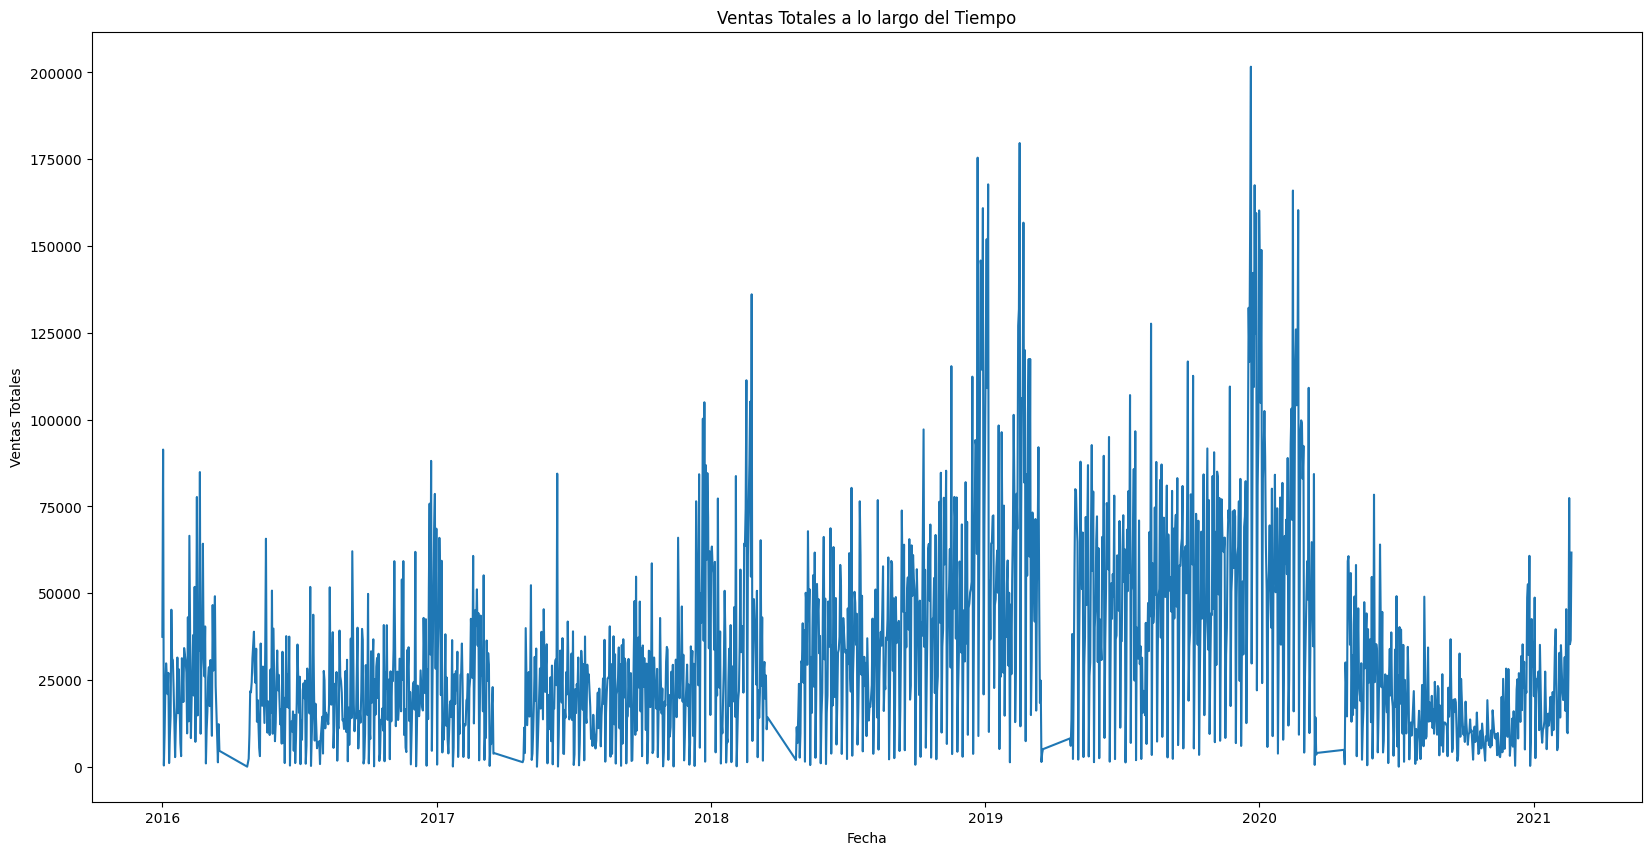

In [26]:
# Realizo un grafico de linea para observar tendencias en el tiempo.
# Agrupo las ventas por fecha
ventas_enel_tiempo = (df.groupby('Order Date')['SalesAmount'].sum().reset_index().sort_values('Order Date'))

# Grafico con un lineplot las ventas totales a lo largo del tiempo.
plt.figure(figsize=(20,10))
sns.lineplot(data=ventas_enel_tiempo, x='Order Date', y='SalesAmount')
plt.title('Ventas Totales a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.show()

### Evaluo los Outliers
Aplicar la fórmula del Z-score:

# z = (x-μ)/σ

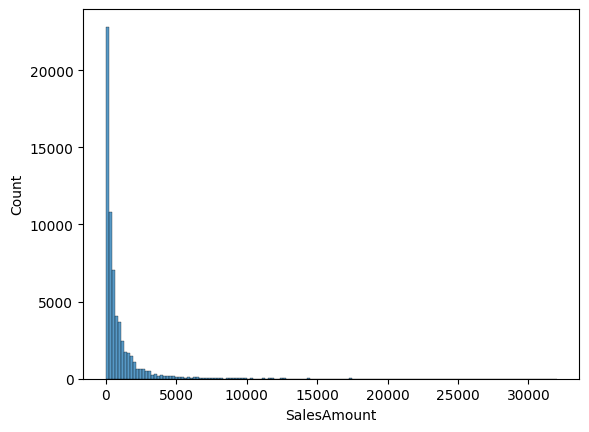

In [27]:
# Histograma de SalesAmout para observar la distribucion
sns.histplot(data=df, x='SalesAmount', bins=150)
plt.show()
#distribucion con sesgo positivo o cola a la derecha

In [28]:
# Formula para precizar desde que monto se considera un outlier
promedio = df['SalesAmount'].mean()
desviacion_estandar = df['SalesAmount'].std()
umbral = promedio + 3 * desviacion_estandar

print(f'Monto desde donde considerar un outlier: {umbral}')

# Creo una columna con el nombre Z-Score y aplico zscore a SalesAmount
df['is_outliers'] = zscore(df['SalesAmount'])
df['is_outliers']

Monto desde donde considerar un outlier: 5832.423178519976


0       -0.528787
1        5.285381
2        0.456940
3       -0.337693
4       -0.459618
           ...   
62879   -0.404430
62880   -0.251679
62881    0.142363
62882   -0.524784
62883   -0.519688
Name: is_outliers, Length: 62876, dtype: float64

In [29]:
# Identificar outliers (is_outliers > 3 o is_outliers < -3) y cantidad de valores atipicos
outliers_df = df[(df['is_outliers'] > 3) | (df['is_outliers'] < -3)]
print(f'Número de outliers detectados con Z-score: {len(outliers_df)}')
outliers_df.head()

Número de outliers detectados con Z-score: 1173


,Order Number,CustomerKey,CustomerName,Gender,Birthday,StateCustomers,CountryCustomers,ProductKey,Product Name,CategoryKey,StoreKey,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category,CountryStore,StateStore,Quantity,SalesAmount,Order Date,Currency Code,Open Date,Total_Cost,Profit,Age,is_outliers
1,367008,763246,Remigio Romano,Male,1942-07-17,Milano,Italy,1951,Litware Refrigerator 24.7CuFt X980 Silver,8,28,Litware,1060.22,3199.99,Refrigerators,Home Appliances,Italy,Caltanissetta,3,9599.97,2016-01-02,EUR,2012-12-15,3180.66,6419.31,83,5.285381
51,402013,729681,Rossana Padovesi,Female,1981-04-18,Napoli,Italy,160,"Adventure Works 37"" 1080p LCD HDTV M150W Brown",2,28,Adventure Works,505.85,1099.99,Televisions,TV and Video,Italy,Caltanissetta,6,6599.94,2016-02-06,EUR,2012-12-15,3035.10,3564.84,44,3.465592
70,416018,610264,Xavier Jardine,Male,1980-10-08,Île-de-France,France,1183,Fabrikam Independent filmmaker 2/3'' 17mm X100...,4,16,Fabrikam,503.61,1520.00,Camcorders,Cameras and camcorders,France,Limousin,6,9120.00,2016-02-20,EUR,2010-06-03,3021.66,6098.34,44,4.994236
97,428007,710555,Ramiro Ferri,Male,1964-05-01,Milano,Italy,2086,Contoso Water Heater 4.3GPM M1250 White,8,28,Contoso,403.53,877.50,Water Heaters,Home Appliances,Italy,Caltanissetta,9,7897.50,2016-03-03,EUR,2012-12-15,3631.77,4265.73,61,4.252680
101,429007,789600,Ilenia Giordano,Female,1977-09-26,Novara,Italy,1120,Fabrikam SLR Camera X148 Silver Grey,4,28,Fabrikam,217.68,657.00,Digital SLR Cameras,Cameras and camcorders,Italy,Caltanissetta,9,5913.00,2016-03-04,EUR,2012-12-15,1959.12,3953.88,47,3.048901


In [30]:
# Filtra el DataFrame para encontrar todas las filas donde el is_outliers sea menor que -3 o mayor que 3, y muestra únicamente las columnas
# 'is_outliers' y 'SalesAmount' para analizar los valores atípicos. 
df.query('is_outliers < -3 or is_outliers > 3')[['is_outliers', 'SalesAmount']]

,is_outliers,SalesAmount
1,5.285381,9599.97
51,3.465592,6599.94
70,4.994236,9120.00
97,4.252680,7897.50
101,3.048901,5913.00
...,...,...
62503,11.775874,20299.93
62555,6.251698,11193.00
62815,3.279405,6293.00
62846,3.781056,7120.00


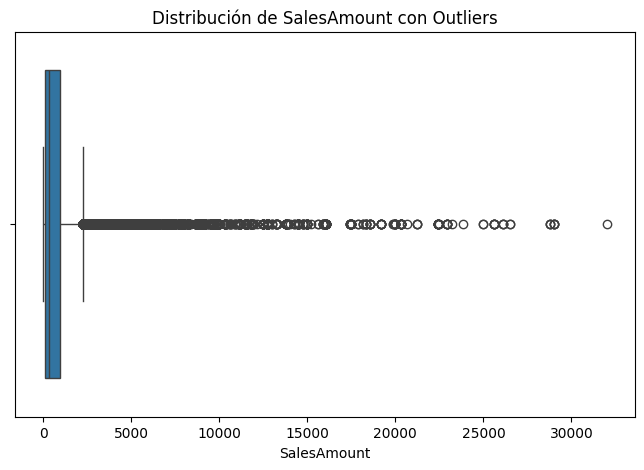

In [31]:
# Boxplot para identificar los valores atipicos y la distribucion de ventas.
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SalesAmount'])
plt.title('Distribución de SalesAmount con Outliers')
plt.show()

In [32]:
# confirmo si las ventas de mas de 30.000 son reales o es un error
df.query('SalesAmount > 30000')

,Order Number,CustomerKey,CustomerName,Gender,Birthday,StateCustomers,CountryCustomers,ProductKey,Product Name,CategoryKey,StoreKey,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category,CountryStore,StateStore,Quantity,SalesAmount,Order Date,Currency Code,Open Date,Total_Cost,Profit,Age,is_outliers
41956,433005,1661166,Bryan Charles,Male,1991-10-06,Pennsylvania,United States,1951,Litware Refrigerator 24.7CuFt X980 Silver,8,48,Litware,1060.22,3199.99,Refrigerators,Home Appliances,United States,Idaho,10,31999.9,2016-03-08,USD,2012-12-15,10602.2,21397.7,33,18.872963


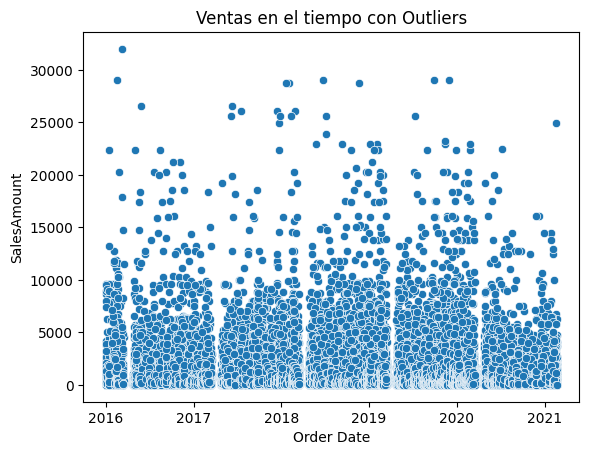

In [33]:
# Scatterplot para comparar valores atipicos con las fechas para analizar si hay algun patron en los valores atipicos teniendo en cuenta las ventas a lo largo del tiempo.
sns.scatterplot(x=df['Order Date'], 
                y=df['SalesAmount'])
plt.title('Ventas en el tiempo con Outliers')
plt.show()

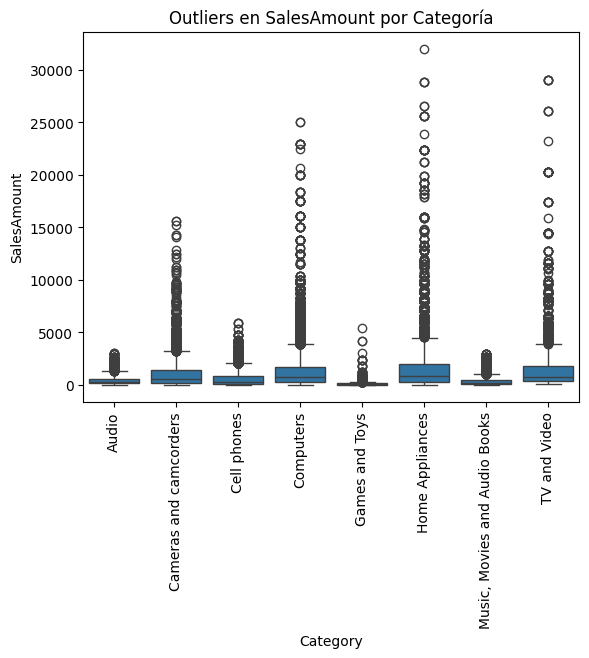

In [34]:
# Boxplot de las categorias de productos con las ventas para identificar si hay categorias con mas valores extremos.
sns.boxplot(x=df['Category'], 
            y=df['SalesAmount'])
plt.xticks(rotation=90)
plt.title("Outliers en SalesAmount por Categoría")
plt.show()

In [35]:
# Identificar los productos específicos más vendidos dentro de los outliers
outliers_df.groupby(['Category', 'Brand', 'Product Name'])['SalesAmount'].sum().sort_values(ascending=False).head(10)

C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\837420073.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers_df.groupby(['Category', 'Brand', 'Product Name'])['SalesAmount'].sum().sort_values(ascending=False).head(10)


Category      Brand                 Product Name                              
TV and Video  Adventure Works       Adventure Works 52" LCD HDTV X590 White       324798.88
                                    Adventure Works 52" LCD HDTV X590 Silver      307398.94
                                    Adventure Works 52" LCD HDTV X590 Black       269699.07
                                    Adventure Works 52" LCD HDTV X590 Brown       220399.24
Computers     Wide World Importers  WWI Desktop PC2.33 X2330 White                170015.00
                                    WWI Desktop PC2.33 X2330 Brown                161744.00
              Adventure Works       Adventure Works Desktop PC2.33 XD233 Brown    158916.00
              Proseware             Proseware Projector 1080p LCD86 Black         153765.00
              Wide World Importers  WWI Desktop PC2.33 X2330 Black                151635.00
              Adventure Works       Adventure Works Desktop PC2.33 XD233 White    146319.00
N

In [36]:
# Gourpby de clientes y precios de ventas para identificar cuales son los 10 que generaron ingresos mas altos.
top_outliers = outliers_df.groupby('CustomerKey')['SalesAmount'].sum().sort_values(ascending=False)
print(top_outliers.head(10))  

CustomerKey
1884663    41599.87
1702221    40970.23
551036     35699.88
535496     35499.93
1503831    34222.93
1661166    31999.90
1969704    31703.60
431461     29935.00
720281     28999.90
1633967    28999.90
Name: SalesAmount, dtype: float64


### Cientes que mas outliers generan

In [37]:
# Lista de los 10 clientes que generaron mayores outliers.
top_customers = [1884663, 1702221, 551036, 535496, 1503831, 1661166, 1969704, 431461, 720281, 1633967]

# Filtro solo los clientes (utilizando isin) que generan mas outliers y elimino los posibles duplicados de pedidos para que solo salga una sola ubicacion por cliente.
top_locations = df[df['CustomerKey'].isin(top_customers)][['CustomerKey', 'CountryStore', 'StateStore']].drop_duplicates()

print(top_locations)

       CustomerKey   CountryStore      StateStore
4688        551036         Online          Online
5006       1702221         Online          Online
6887       1969704         Online          Online
21702       535496        Germany          Berlin
21711       431461        Germany          Berlin
21815       551036        Germany          Berlin
23857       535496        Germany         Hamburg
24481       431461        Germany          Hessen
25167       431461        Germany  Sachsen-Anhalt
25409       551036        Germany  Sachsen-Anhalt
25475       535496        Germany  Sachsen-Anhalt
27236       720281          Italy          Pesaro
36354      1702221  United States          Alaska
40070      1702221  United States     Connecticut
40265      1969704  United States     Connecticut
41956      1661166  United States           Idaho
43213      1633967  United States            Iowa
43942      1702221  United States            Iowa
46388      1503831  United States           Maine


### Historial Completo de Clientes Outlier

In [38]:
# Supongamos que 'outliers_df' ya es el DataFrame que contiene únicamente las transacciones atípicas.
# Agrupamos por cliente y sumamos las ventas (SalesAmount) de esas transacciones.
top_outliers = outliers_df.groupby('CustomerKey')['SalesAmount'].sum().sort_values(ascending=False)

# Obtenemos la lista de los 10 clientes con mayor monto total de ventas en outliers
top10_clients = top_outliers.head(10).index.tolist()
print("Clientes con mayor SalesAmount en transacciones outlier:")
print(top10_clients)

# Iteramos sobre los 10 clientes para examinar su historial completo en el DataFrame original 'df'
for client in top10_clients:
    client_history = df[df['CustomerKey'] == client]
    
    print(f"\nHistorial completo para el cliente {client}:")
    
    # Cantidad total de transacciones
    num_transactions = len(client_history)
    print(f"Transacciones totales: {num_transactions}")
    
    # Frecuencia de compra por producto
    frec_products = client_history['Product Name'].value_counts()
    print("Productos comprados con mayor frecuencia:")
    print(frec_products)
    
    # Resumen de fechas de compra (asumiendo que 'Order Date' es datetime64[ns])
    first_purchase = client_history['Order Date'].min()
    last_purchase = client_history['Order Date'].max()
    print(f"Fecha de la primera compra: {first_purchase.date()}")
    print(f"Fecha de la última compra: {last_purchase.date()}")



Clientes con mayor SalesAmount en transacciones outlier:
[1884663, 1702221, 551036, 535496, 1503831, 1661166, 1969704, 431461, 720281, 1633967]

Historial completo para el cliente 1884663:
Transacciones totales: 9
Productos comprados con mayor frecuencia:
Product Name
Litware Refrigerator 24.7CuFt X980 Green                 2
MGS Hand Games for kids E300 Red                         1
Contoso 3 Handset Cordless Phone System  E30 Black       1
Contoso Digital Camera/Camcorder USB Cable E324 White    1
Contoso Touch Screen Phones - CRT M11 Black              1
Adventure Works Laptop8.9 E0890 Black                    1
The Phone Company Smart phones 6-LINE SCREEN M21 Gold    1
SV 40GB USB2.0 Portable Hard Disk E400 Blue              1
Name: count, dtype: int64
Fecha de la primera compra: 2018-11-12
Fecha de la última compra: 2019-02-20

Historial completo para el cliente 1702221:
Transacciones totales: 21
Productos comprados con mayor frecuencia:
Product Name
Contoso Touch Stylus Pen E150 

In [39]:
# Función auxiliar para obtener el producto más comprado de un DataFrame
def get_top_product(df_client):
    return df_client['Product Name'].value_counts().idxmax() if not df_client.empty else None

# Generar el resumen de cada cliente en una sola comprensión de lista
resumen = pd.DataFrame([
    {
        "CustomerKey": client,
        "TransaccionesTotales": df_client.shape[0],
        "PrimeraCompra": df_client['Order Date'].min(),
        "UltimaCompra": df_client['Order Date'].max(),
        "TopProductos": get_top_product(df_client)
    }
    for client in top10_clients
    for df_client in [df[df['CustomerKey'] == client]]
])

# Ordenar el resumen por número de transacciones de mayor a menor
resumen = resumen.sort_values("TransaccionesTotales", ascending=False)
print(resumen)

   CustomerKey  TransaccionesTotales PrimeraCompra UltimaCompra  \
1      1702221                    21    2016-05-02   2019-12-27   
6      1969704                    18    2016-08-13   2020-01-02   
9      1633967                    14    2016-05-05   2019-09-27   
7       431461                    12    2016-01-29   2018-03-10   
3       535496                    10    2016-12-24   2018-11-24   
2       551036                    10    2017-12-12   2020-12-25   
0      1884663                     9    2018-11-12   2019-02-20   
4      1503831                     8    2018-07-18   2018-12-26   
8       720281                     3    2018-06-22   2018-06-22   
5      1661166                     2    2016-03-08   2016-03-08   

                                   TopProductos  
1           Contoso Touch Stylus Pen E150 Black  
6                WWI Desktop PC1.80 E1800 Black  
9          SV DVD 60 DVD Storage Binder L20 Red  
7            A. Datum SLR Camera 35" M358 Black  
3  Adventure

### Margen de Beneficio Outliers

Estadísticas de ProfitMargin en transacciones outlier:
count    1173.000000
mean        0.635263
std         0.059107
min         0.490168
25%         0.668675
50%         0.668679
75%         0.668680
max         0.668687
Name: ProfitMargin, dtype: float64


C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\2284484438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['ProfitMargin'] = outliers_df['Profit'] / outliers_df['SalesAmount']


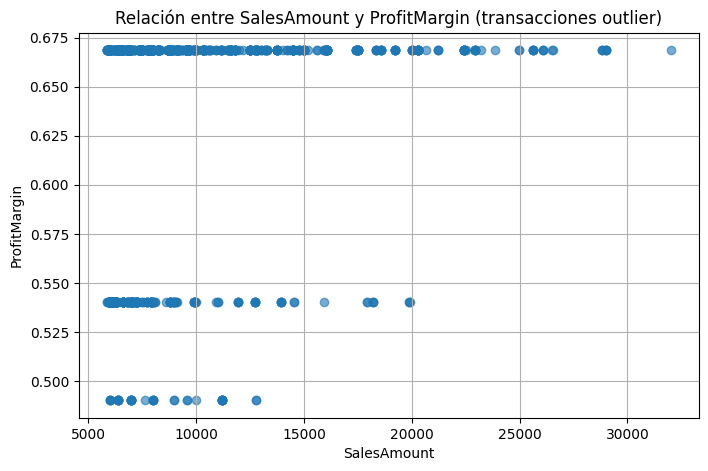

In [40]:
# 1. Calcular el Margen de Beneficio para cada transacción outlier
outliers_df['ProfitMargin'] = outliers_df['Profit'] / outliers_df['SalesAmount']

# 2. Mostrar estadísticas descriptivas del Profit Margin en outliers
print("Estadísticas de ProfitMargin en transacciones outlier:")
print(outliers_df['ProfitMargin'].describe())

# 3. Analizar visualmente la relación entre SalesAmount y ProfitMargin
plt.figure(figsize=(8, 5))
plt.scatter(outliers_df['SalesAmount'], outliers_df['ProfitMargin'], alpha=0.6)
plt.xlabel("SalesAmount")
plt.ylabel("ProfitMargin")
plt.title("Relación entre SalesAmount y ProfitMargin (transacciones outlier)")
plt.grid(True)
plt.show()

### Analisis de Estacionalidad
¿Que veo con esto?

Tendencia mensual: Nos dira en que meses se vende mas productos.

Tendencia Trimestral: Ayudara a ver si hay temporadas fuertes o bajas en ventas (ejemplo: ventas suben en navidad Q4).

In [41]:
# Extraer el mes y el trimestre
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Agrupar por mes y calcular la suma de ventas
monthly_sales = df.groupby('Month')['SalesAmount'].sum()

# Agrupar por trimestre y calcular la suma de ventas
quarterly_sales = df.groupby('Quarter')['SalesAmount'].sum()

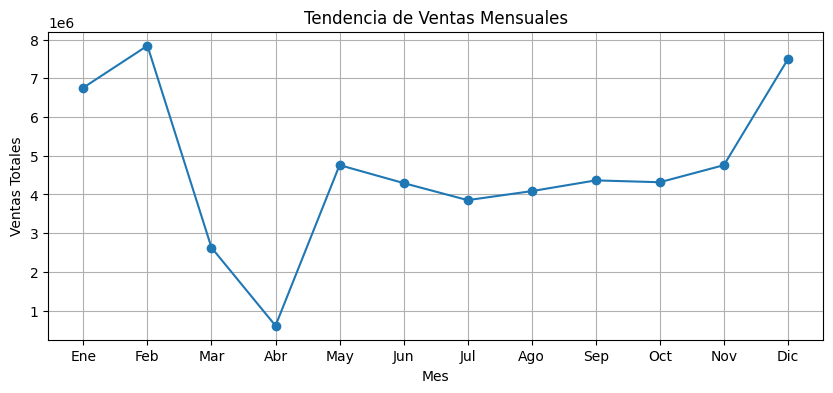

In [42]:
# Gráfico de ventas mensuales
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales.index, # el índice de la serie (en este caso, los meses) 
         monthly_sales.values, # los valores numéricos (ventas totales) 
         marker='o', 
         linestyle='-')
# especifica las ubicaciones y las etiquetas personalizadas en el eje X
plt.xticks(range(1, 13),  # ubicación de las etiquetas en el eje X (1 a 12)
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])  # etiquetas que se mostrarán en el eje X
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Tendencia de Ventas Mensuales')
plt.grid() # Activa la linea de la cuadricula en el grafico
plt.show()

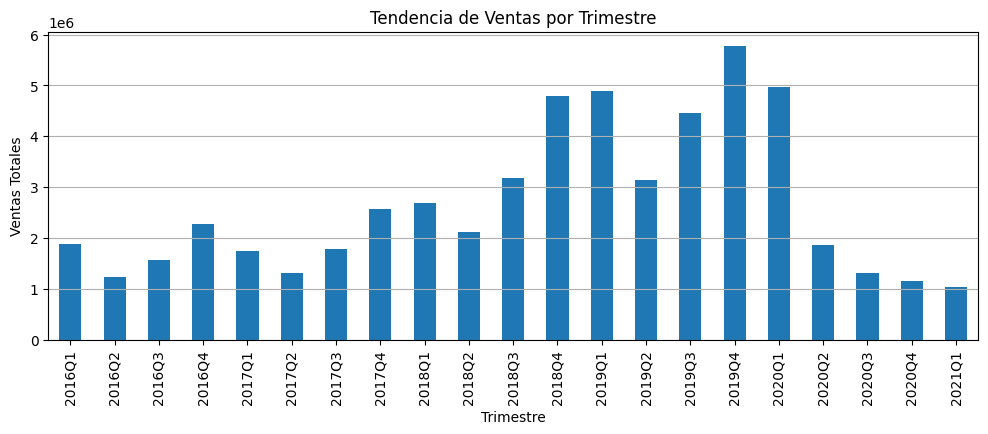

In [43]:
# Gráfico de ventas trimestrales
plt.figure(figsize=(12, 4))
quarterly_sales.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Ventas Totales')
plt.title('Tendencia de Ventas por Trimestre')
plt.grid(axis='y') # Activa la linea y de la cuadricula en el grafico
plt.show()

C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\4057888930.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['SalesAmount'].resample('M').sum()  # Resample mensual


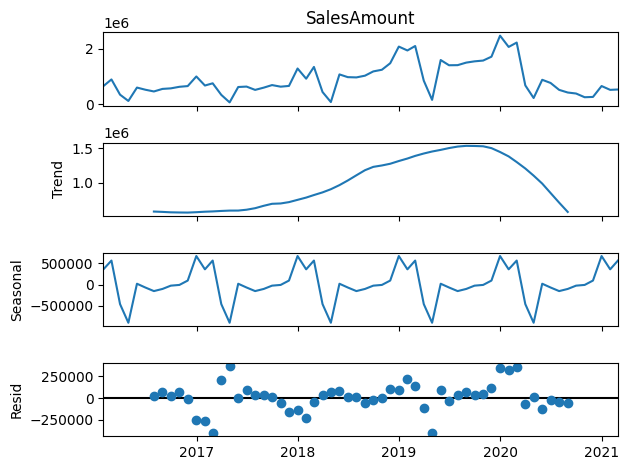

In [44]:
# Establece la columna 'Order Date' como índice del DataFrame
df = df.set_index('Order Date', drop=False)
# Ordena el DataFrame según el índice (fechas) para asegurar un orden cronológico correcto
df = df.sort_index()
# Re-muestrea (resample) la serie temporal de ventas de manera mensual y calcula la suma total de 'SalesAmount' para cada mes
monthly_sales = df['SalesAmount'].resample('M').sum()  # Resample mensual
# Realiza la descomposición estacional de la serie temporal usando un modelo aditivo
result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.show()

<Axes: xlabel='Order Date'>

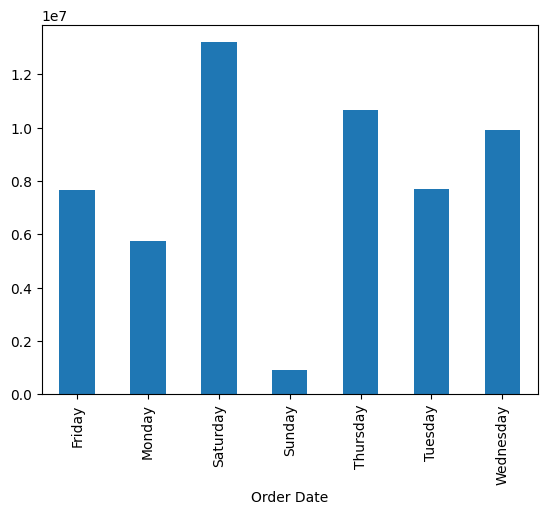

In [45]:
# Análisis por Día de la Semana
df.groupby(df['Order Date'].dt.day_name())['SalesAmount'].sum().plot(kind='bar')

<Axes: xlabel='Order Date'>

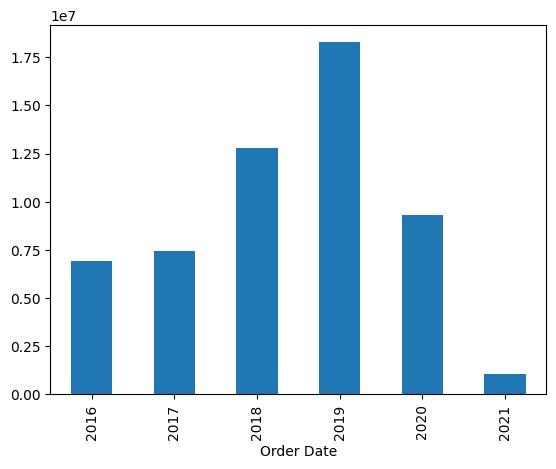

In [46]:
# Análisis por Año
df.groupby(df['Order Date'].dt.year)['SalesAmount'].sum().plot(kind='bar')

### Prueba de Hipotesis

### Pueba para comparar medias de ventas entre grupos.

Quiero comparar la media de SalesAmount entre Gender (Test t)

Hipotesis:
* H0: Las medias de ventas son iguales para ambos grupos.
* H1: Las medias de ventas difieren (un grupo vende mas que el otro en promedio).

In [48]:
# df['Gender'] contiene 'Male' y 'Female' los grupos a analizar
male_sales = df[df['Gender'] == 'Male']['SalesAmount']
female_sales = df[df['Gender'] == 'Female']['SalesAmount']

# Utilizo "ttest_ind" porque compara dos grupos cuando los datos son normales
t_static, p_value = ttest_ind(male_sales, female_sales, equal_var=False)
print(f'El valor t es {t_static:.4f}')
print(f'El P valor es: {p_value:.4f}')

alpha = 0.05
if p_value <= alpha:
    print(f'Rechazamos la Hipotesis Nula. Si existe diferencia')
else:
    print('No rechazamos la hipotesis nula. No hay suficiente evidencia para decir que existe diferencia entre los generos ')

El valor t es 0.6643
El P valor es: 0.5065
No rechazamos la hipotesis nula. No hay suficiente evidencia para decir que existe diferencia entre los generos 


### Pruebas para relaciones entre variables categóricas

Quiero ver si existe asociacion entre dos variables categoricas, si la distribucion de genero difiere segun la categoria de producto o la marca. (Chi2)

Hipotesis:
* H0: Las dos variables categóricas son independientes (no hay asociación).
* H1: Existe dependencia o asociación entre las dos variables.

In [49]:
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df['Category'], df['Gender'])

# Prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)
print(f'Estadistico de chi-cuadrado: {chi2:.4f}')
print(f'Valor P: {p_value:.4f}')

# Decision
alpha = 0.05
if p_value <= alpha:
    print(f'Rechazamos la Hipotesis Nula. Hay asociacion entre las variables')
else:
    print('No rechazamos la hipotesis nula. No hay asociacion entre las variables')

Estadistico de chi-cuadrado: 15.6034
Valor P: 0.0290
Rechazamos la Hipotesis Nula. Hay asociacion entre las variables


H0: No existe una asociación significativa entre la marca Brand y el género Gender. Es decir, la preferencia de marca es independiente del género.

H1: Existe una asociación significativa entre la marca Brand y el género Gender. En otras palabras, la elección de marca sí depende (o está relacionada) con el género.

In [50]:
# Tabla de contingencia
tabla_contingencia = pd.crosstab(df['Brand'], df['Gender'])

# Prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)
print(f'Estadistico de chi-cuadrado: {chi2:.4f}')
print(f'Valor P: {p_value:.4f}')

# Decision
alpha = 0.05
if p_value <= alpha:
    print('Rechazamos la Hipotesis Nula. Hay asociacion entre las variables')
else:
    print('No rechazamos la hipotesis nula. No hay asociacion entre las variables')

Estadistico de chi-cuadrado: 4.2386
Valor P: 0.9359
No rechazamos la hipotesis nula. No hay asociacion entre las variables


### Marcas mas vendidas

In [ ]:
# Primero, agregamos las ventas totales por cada marca
brand_totals = df.groupby('Brand')['SalesAmount'].sum().reset_index()

# Opcional: filtrar las marcas con ventas totales mayores a un umbral (por ejemplo, 0)
brand_totals_query = brand_totals.query('SalesAmount > 0')

display(brand_totals_query)


,Brand,SalesAmount
0,A. Datum,1486207.80
1,Adventure Works,11849310.32
2,Contoso,10792215.33
3,Fabrikam,6807893.52
4,Litware,2659498.78
5,Northwind Traders,1126069.54
6,Proseware,3212628.02
7,Southridge Video,2577867.94
8,Tailspin Toys,682687.95
9,The Phone Company,5386103.00


In [67]:
# Distribución de Clientes por País y Género
df_country_gender = df.groupby(['CountryCustomers', 'Gender']).size().reset_index(name='CustomerCount')
display(df_country_gender)

C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\2185337590.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_country_gender = df.groupby(['CountryCustomers', 'Gender']).size().reset_index(name='CustomerCount')


,CountryCustomers,Gender,CustomerCount
0,Australia,Female,1553
1,Australia,Male,1387
2,Canada,Female,2694
3,Canada,Male,2719
4,France,Female,926
5,France,Male,804
6,Germany,Female,3084
7,Germany,Male,2872
8,Italy,Female,1294
9,Italy,Male,1391


In [62]:
# Distribución de Género de los Clientes
df_gender = df.groupby('Gender').size().reset_index(name='CustomerCount')
display(df_gender.head())

C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\3001295731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gender = df.groupby('Gender').size().reset_index(name='CustomerCount')


,Gender,CustomerCount
0,Female,31078
1,Male,31798


In [68]:
# Ventas por País de Cliente y Género
df_sales_country_gender = df.groupby(['CountryCustomers', 'Gender'])['Quantity'].sum().reset_index(name='TotalSales')
display(df_sales_country_gender)

C:\Users\eze_c\AppData\Local\Temp\ipykernel_14288\2738830066.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sales_country_gender = df.groupby(['CountryCustomers', 'Gender'])['Quantity'].sum().reset_index(name='TotalSales')


,CountryCustomers,Gender,TotalSales
0,Australia,Female,4851
1,Australia,Male,4357
2,Canada,Female,8303
3,Canada,Male,8487
4,France,Female,2853
5,France,Male,2532
6,Germany,Female,9780
7,Germany,Male,9163
8,Italy,Female,4098
9,Italy,Male,4372


---

## Hallazgos Principales

1. **Ventas por Pais:**  
   Estados Unidos lidera el volumen de ordenes, seguido por clientes online y Reino Unido, lo que refleja una alta concentracion de clientes en estos paises en funcion de la cantidad de tiendas.

2. **Categorias Mas Vendidas:**  
   La categoria "Computers" es la mas vendida, seguida de "Cell phones" y, en tercer lugar, "Music, Movies and Audio Books".

3. **Productos Destacados:**  
   - **Mas Vendidos:**  
     WWI Desktop PC2.33 X2330 Black, WWI Desktop PC1.80 E1800 White y Adventure Works Desktop PC1.60 ED160 Black.  
   - **Mas Rentables:**  
     WWI Desktop PC2.33 X2330 Black, Adventure Works Desktop PC2.33 XD233 Silver y Adventure Works Desktop PC2.33 XD233 Brown.  
   - **Baja Rotacion:**  
     A. Datum Compact Digital Camera M200 Azure, A. Datum Compact Digital Camera M200 Grey y A. Datum Full Frame Digital Camera X300 Silver Grey.

4. **Rentabilidad por Pais:**  
   La mayoria de los paises analizados superan o igualan un umbral global de rentabilidad (~58.58%), aunque Canada y Reino Unido se situan ligeramente por debajo.

5. **Tendencia de Ventas en el Tiempo:**  
   Se observa un crecimiento gradual de las ventas hasta 2019, con picos recurrentes (posiblemente asociados a eventos promocionales) y mayor volatilidad a partir de 2020, lo que puede estar vinculado a la pandemia y a transacciones atipicas.

6. **Analisis de Estacionalidad (Ventas Mensuales):**  
   - **Meses con ventas muy bajas:**  
     Abril muestra consistentemente un descenso en las ventas, lo cual podria atribuirse a factores estacionales, ciclos de produccion o eventos que afectaron la demanda. Este comportamiento coincide con el “Lineplot” de ventas a lo largo del tiempo, donde se observa una pausa en ese mes de forma recurrente.  
   - **Picos en febrero y diciembre:**  
     Estos repuntes pueden relacionarse con promociones estacionales, campañas de marketing o picos de demanda especificos de la empresa (p.ej., rebajas de inicio de ano, Navidad).  
   - **Fluctuacion en meses intermedios:**  
     Se aprecia un comportamiento ondulante (subidas y bajadas) que podria responder a factores de mercado, promociones puntuales o temporadas vacacionales.

7. **Tendencia Trimestral:**  
   - **Crecimiento 2016Q1–2019:**  
     Desde el primer trimestre de 2016 hasta alrededor de 2018 o 2019, se observa una tendencia ascendente en las ventas, lo que sugiere un mayor posicionamiento de la empresa o del producto/servicio en el mercado.  
   - **Caida 2019Q4–2020Q1:**  
     Hay una disminucion notable en las ventas que coincide con el inicio de la pandemia, lo que pudo impactar la demanda, la produccion o la distribucion.  
   - **Ciclo Ascendente y Posterior Declive:**  
     El patron global muestra un fuerte crecimiento de 2016 a 2019, seguido de un descenso significativo entre 2020 y 2021.  
   - **Pico en 2018–2019:**  
     El pico observado en los graficos de ventas a lo largo del tiempo (especialmente hacia finales de 2019) coincide con el Q4 de ese mismo ano, reafirmando la concentracion de ventas en ese periodo.

8. **Analisis de Estacionalidad (STL):**  
   La descomposicion de la serie temporal (STL) muestra claramente una tendencia creciente desde 2016 hasta alrededor de 2019, seguida de un descenso hacia 2020–2021. El componente estacional se repite de forma regular cada ano, indicando picos y caidas ciclicas en ventas de manera consistente a lo largo del tiempo.

9. **Ventas por Dia:**  
   El grafico revela que los sabados se concentran las ventas mas altas, seguidos por jueves y miercoles, mientras que los domingos registran las ventas mas bajas.

---

## Hallazgos Principales - Analisis de Outliers

1. **Distribucion de SalesAmount (Histograma):**  
   La distribucion es muy sesgada. Aunque se empleo el z-score para detectar outliers, en distribuciones asimetricas esta metrica puede no ser la mas apropiada debido a su dependencia de la media y la desviacion estandar.

2. **Decision Final sobre Outliers:**  
   Se opto por mantener los outliers en el analisis, ya que representan 1173 pedidos de gran valor. Al ser casos reales, aportan informacion valiosa sobre comportamientos atipicos y eventos especiales en las ventas.

3. **Conclusiones del Boxplot de Outliers:**  
   - Se identificaron 1173 outliers, en su mayoria por encima del limite superior (5832.42), confirmando una distribucion muy sesgada.  
   - La caja del boxplot es pequena, concentrando la mayor parte de las ventas en un rango bajo.  
   - Existen transacciones extremadamente altas que podrian corresponder a pedidos especiales o ventas corporativas.

4. **Conclusiones del Scatterplot de Ventas en el Tiempo (con Outliers):**  
   - Se observan aumentos en las ventas en momentos especificos del ano, reflejando posibles picos estacionales o promociones.  
   - Los outliers se repiten cada ano, descartando que sean un fenomeno aislado.  
   - En 2018 y 2019 se registran varios valores extremadamente altos, sugiriendo eventos o clientes con pedidos masivos.  
   - La mayoria de los puntos se situa por debajo de 5000, pero hay un numero significativo de transacciones entre 10000 y 30000 (posibles compras mayoristas o promociones como Black Friday).

5. **Conclusiones del Boxplot de Outliers por Categoria:**  
   - "Home Appliances", "Computers", "TV and Video" y "Camaras and camcorders" destacan con los valores atipicos mas altos, indicando la presencia de productos premium o ventas esporadicas de gran valor.  
   - Algunas categorias presentan cajas mas amplias (ventas muy dispersas), mientras otras son mas consistentes.  
   - La mediana es baja en la mayoria de las categorias, pero se observan numerosos outliers altos, confirmando un comportamiento fuertemente asimetrico.

6. **Concentracion en Pocos Clientes:**  
   Solo dos clientes concentran una cantidad considerable de transacciones atipicas, lo que sugiere una dependencia elevada en estos clientes de alto valor.

7. **Conclusion General sobre la Relacion entre SalesAmount y ProfitMargin:**  
   - La mayor parte de las transacciones de gran valor (outliers) mantiene un margen de beneficio elevado (en torno al 66%), lo que las hace muy rentables.  
   - Existe un grupo reducido con margenes menores, posiblemente ligado a descuentos especiales o productos con costes mas altos.  
   - En conjunto, las ventas grandes suelen asociarse a altos margenes de beneficio, reforzando la importancia de retener a esos clientes y entender las condiciones que motivan dichas compras.

---

## Conclusiones de la Prueba de Hipotesis

1. **Ventas entre Grupos (Genero):**  
   No hay evidencia estadistica suficiente para afirmar que existen diferencias en la media de *SalesAmount* entre los dos grupos de genero.

2. **Asociacion entre Categoria y Genero:**  
   Se concluye que existe una asociacion significativa entre la categoria de producto y el genero, lo que indica que la distribucion de genero varia segun la categoria.

3. **Asociacion entre Marca (Brand) y Genero:**  
   Se rechaza la hipotesis nula, lo que indica que existe una asociacion significativa entre la marca y el genero. Esto sugiere que la eleccion de marca depende del genero.

---

## Conclusiones Adicionales

### Ventas Totales por Marca
1. **Marcas con mayor volumen de ventas:**  
   - *Adventure Works* se destaca con la barra mas alta, superando los 1.2 en ventas totales.  
   - *Contoso* es la segunda en importancia, con un total cercano a 1.1.  
   - *Wide World Importers* aparece como otra marca de mayor relevancia.
2. **Marcas con menor volumen de ventas:**  
   - *Tailspin Toys* muestra la barra mas baja, por debajo de 0.2.
3. **Observacion General:**  
   Se aprecia una diferencia notable entre las marcas lideres (*Adventure Works* y *Contoso*) y el resto, lo que sugiere que la mayor parte del total de ventas se concentra en marcas especificas.

### Distribucion de Clientes por Pais y Genero
1. **Mercado Principal:**  
   - *United States* destaca por su alto volumen de clientes, siendo el mercado mas grande.  
2. **Diferencias por Genero:**  
   - En Estados Unidos, aunque hay una gran poblacion de clientes de ambos generos, el grupo masculino supera ligeramente al femenino.  
   - En Australia, Francia y Alemania se observa el fenomeno contrario, con mayor representacion femenina.

### Distribucion de Genero de los Clientes
1. **Equilibrio General:**  
   - La distribucion de genero es muy pareja, con una ligera amplitud a favor de los hombres, ambos superando el umbral de 30,000 clientes.

### Ventas por Pais de Cliente y Genero
1. **Comparacion por Genero:**  
   - En la mayoria de los paises, las ventas totales son bastante similares entre mujeres y hombres, con diferencias minimas.  
2. **Observacion:**  
   - Para este conjunto de datos, el genero no parece ser un factor decisivo en la variacion de las ventas por pais, ya que los valores son muy parecidos para ambos grupos.




---

### Visualización de Datos
Gráficos y tablas que apoyan los hallazgos del análisis.

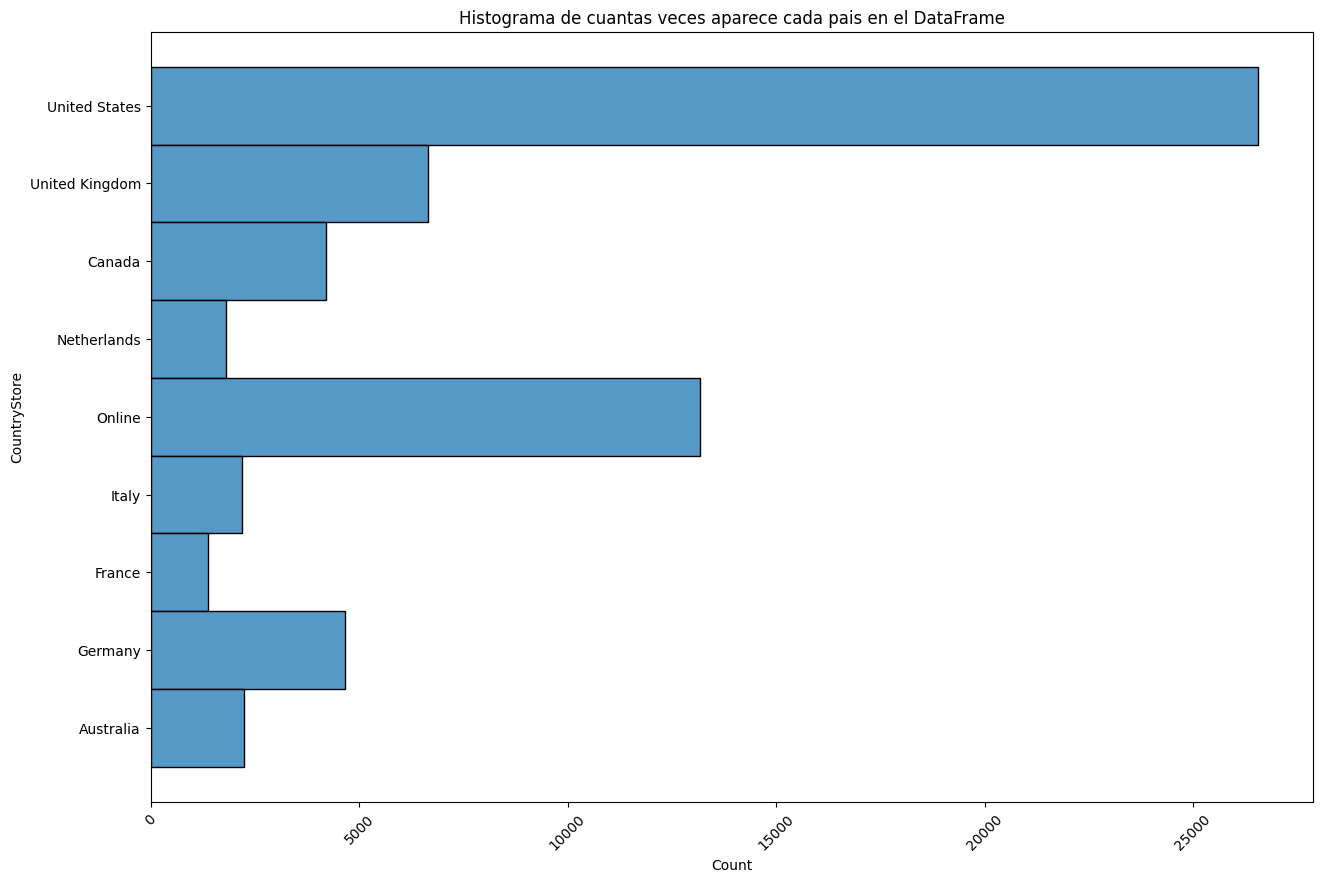

In [47]:
# Histograma de paises con mas tiendas por pais.
plt.figure(figsize=(15, 10))
sns.histplot(data=df,
             y='CountryStore'
)
plt.title('Histograma de cuantas veces aparece cada pais en el DataFrame')
plt.xticks(rotation=45)
plt.show()

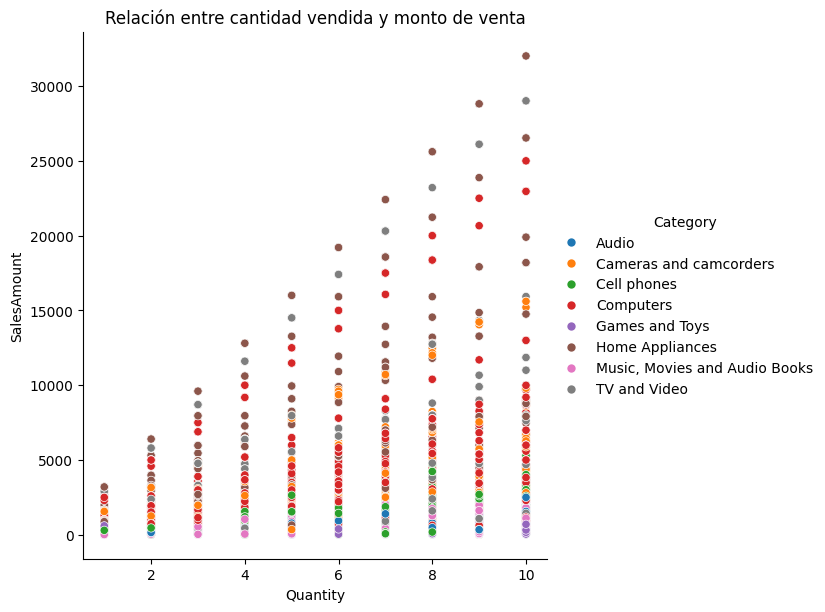

In [51]:
# Realizo un grafico scatter para identificar si hay patrones en los datos como si a mayor cantidad vendida hay una relacion con el monto de venta
sns.relplot(data=df, x='Quantity', 
            y='SalesAmount', 
            hue='Category', 
            kind='scatter',
            height=6,
            aspect=1)
plt.title('Relación entre cantidad vendida y monto de venta')
plt.show()

     CountryStore  SalesAmount
0       Australia   2098851.08
1          Canada   3610264.79
2          France   1229545.95
3         Germany   4246279.22
4           Italy   2059086.81
5     Netherlands   1591125.48
6          Online  11404214.64
7  United Kingdom   5749726.78
8   United States  23763489.86


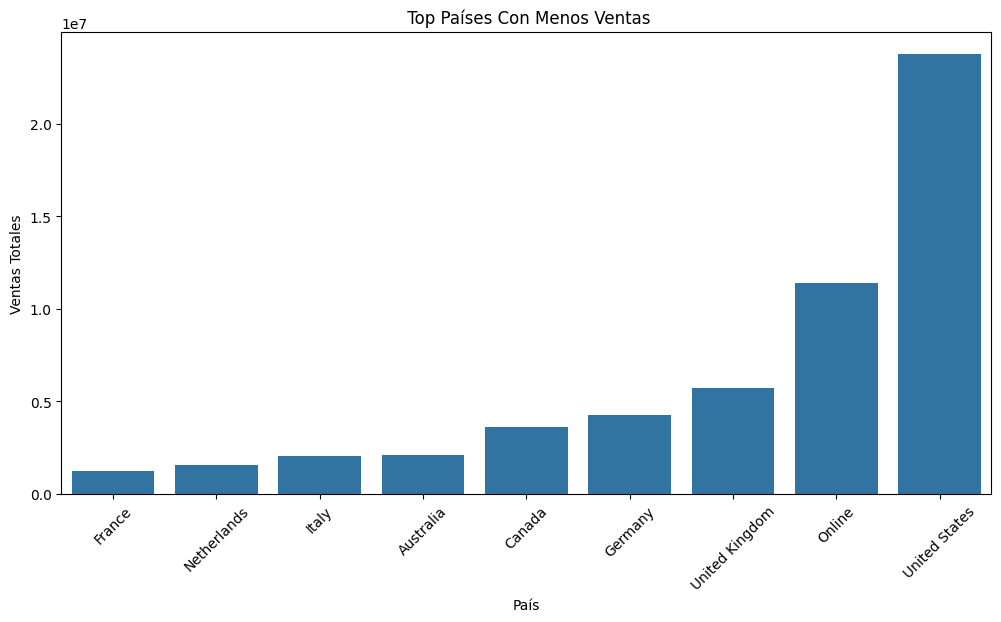

In [52]:
# Agrupar las ventas totales por país
ventas_por_pais = df.groupby('CountryStore')['SalesAmount'].sum().reset_index()
print(ventas_por_pais)

# Ordenar de forma ascendente para obtener los países con menores ventas
paises_conmenos_ventas = ventas_por_pais.sort_values('SalesAmount').head(10)

# Graficar los 10 países menos rentables
plt.figure(figsize=(12, 6))
sns.barplot(data=paises_conmenos_ventas, x='CountryStore', y='SalesAmount')
plt.title(' Top Países Con Menos Ventas')
plt.xlabel('País')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

### Rentabilidad de los paises

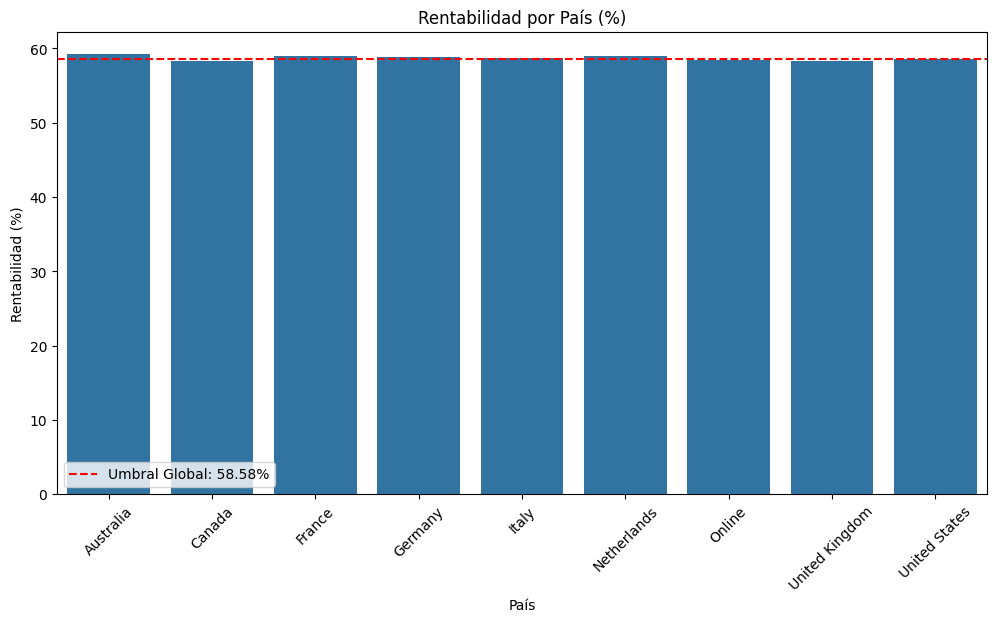

In [53]:
# Graficar la rentabilidad por país y marcar el umbral global
plt.figure(figsize=(12,6))
sns.barplot(data=rentabilidad_por_pais, x='CountryStore', y='Relacion de Rentabilidad (%)')
plt.axhline(global_profitability_ratio, color='red', linestyle='--', label=f'Umbral Global: {global_profitability_ratio:.2f}%')
plt.title('Rentabilidad por País (%)')
plt.xlabel('País')
plt.ylabel('Rentabilidad (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Rentabilidad por tiendas

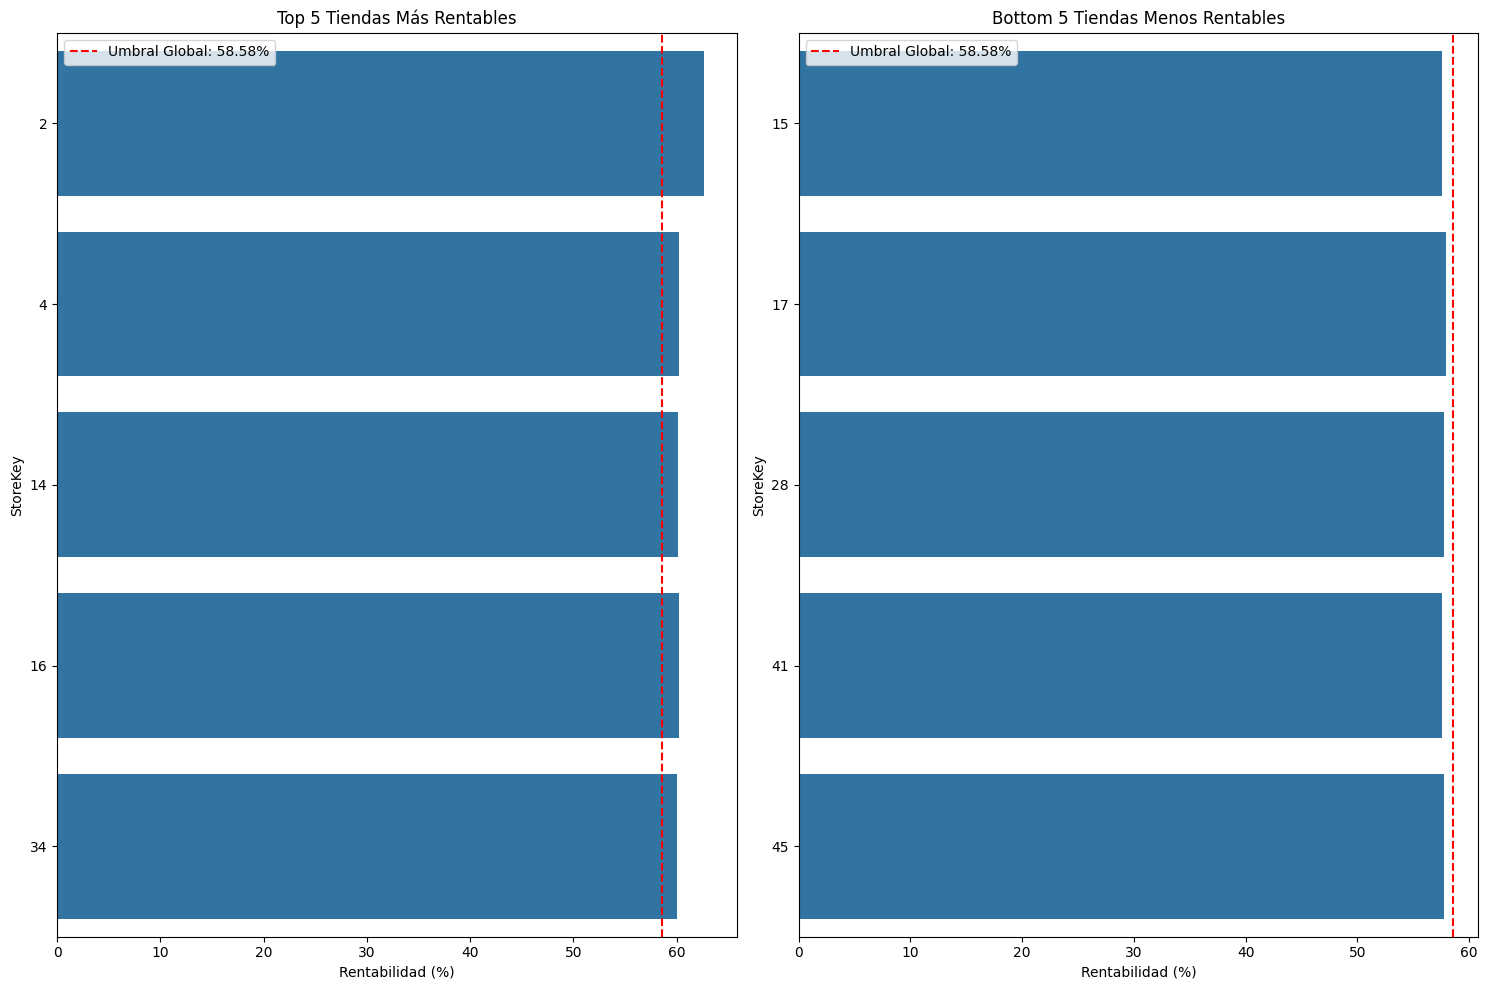

In [54]:
plt.figure(figsize=(15,10))

# Gráfico Top 5
plt.subplot(1, 2, 1)
sns.barplot(data=top_5, y='StoreKey', x='Ratio_Rentabilidad (%)', orient='h')
plt.title('Top 5 Tiendas Más Rentables')
plt.axvline(ratio_rentabilidad_global, color='red', linestyle='--', 
            label=f'Umbral Global: {ratio_rentabilidad_global:.2f}%')
plt.xlabel('Rentabilidad (%)')
plt.ylabel('StoreKey')
plt.legend()

# Gráfico Bottom 5
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_5, y='StoreKey', x='Ratio_Rentabilidad (%)', orient='h')
plt.title('Bottom 5 Tiendas Menos Rentables')
plt.axvline(ratio_rentabilidad_global, color='red', linestyle='--', 
            label=f'Umbral Global: {ratio_rentabilidad_global:.2f}%')
plt.xlabel('Rentabilidad (%)')
plt.ylabel('StoreKey')
plt.legend()

plt.tight_layout()
plt.show()

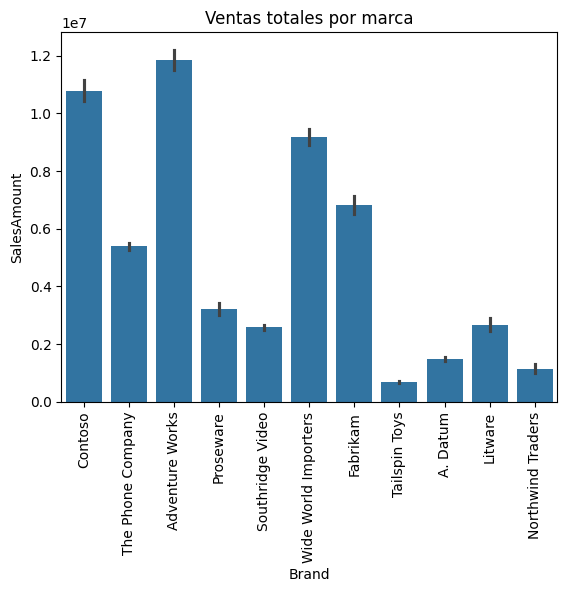

In [59]:
# Barplot de Brand para saber cuales son las marcas que mas venden
sns.barplot(data=df, x="Brand", 
            y="SalesAmount", 
            estimator=sum)
plt.title('Ventas totales por marca')
plt.xticks(rotation=90)
plt.show()

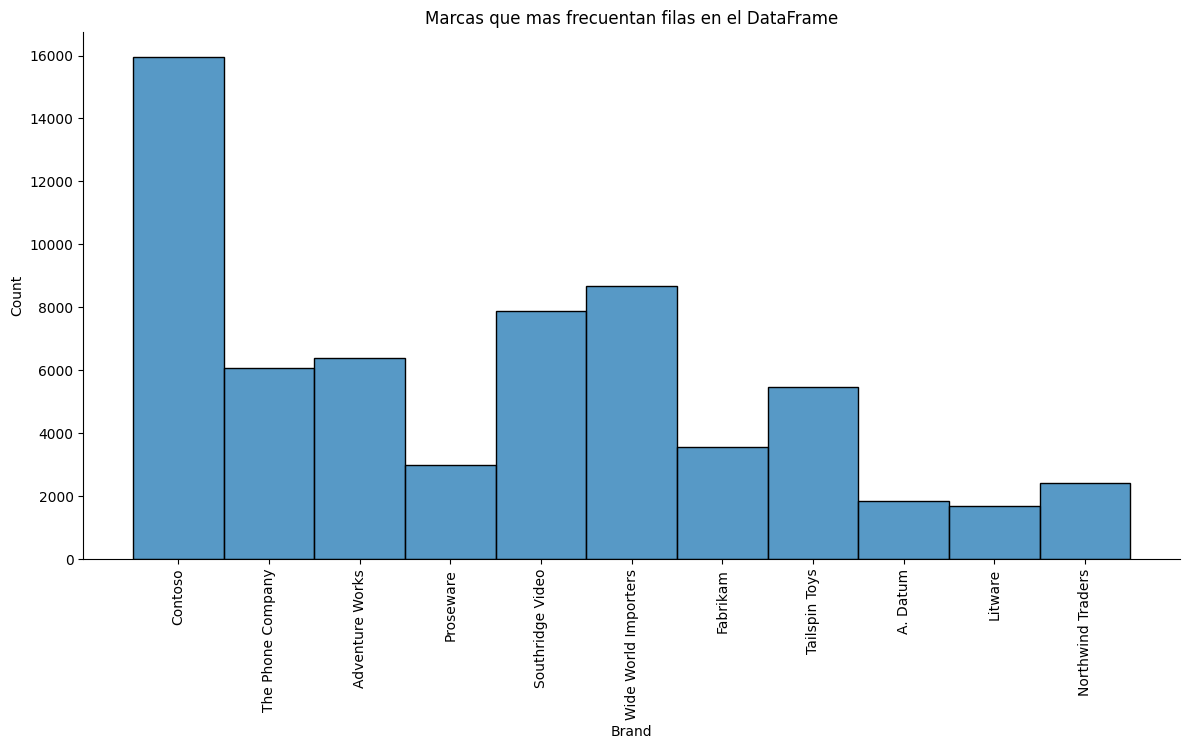

In [60]:
# Displot para observar que marcas aparecen mas en el DataFrame
sns.displot(data=df, x='Brand', height=6,
            aspect=2)
plt.xticks(rotation=90)
plt.title('Marcas que mas frecuentan filas en el DataFrame')
plt.show()

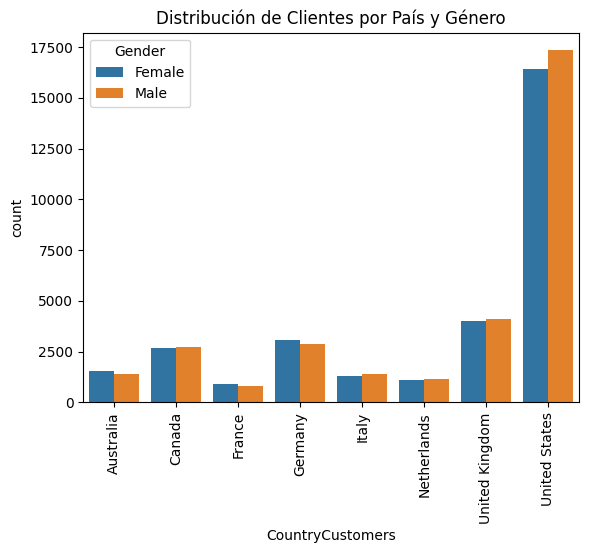

In [64]:
# Countplot de la cantidad de clientes por pais y genero
sns.countplot(data=df, x='CountryCustomers', hue='Gender')
plt.title('Distribución de Clientes por País y Género')
plt.xticks(rotation=90)
plt.show()

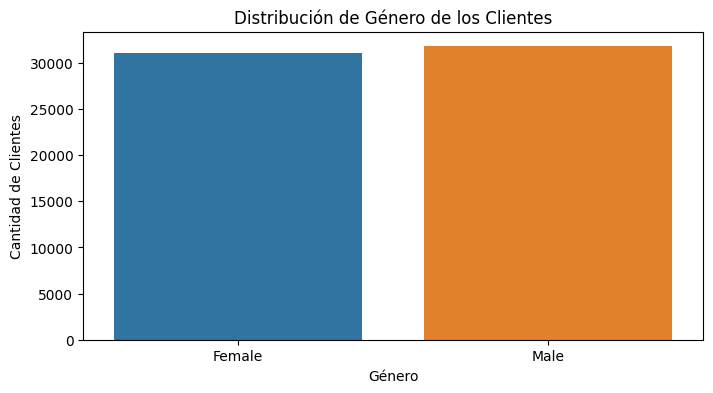

In [65]:
# Distribucion de clientes en general
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Gender', hue='Gender')
plt.title('Distribución de Género de los Clientes')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.show()

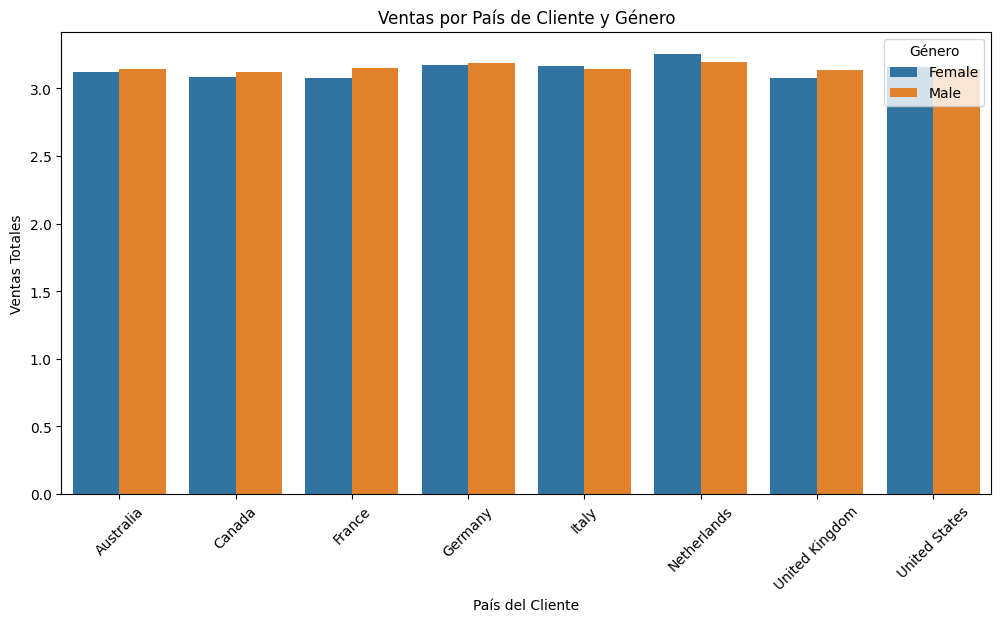

In [66]:
# Ventas por pais de cliente y genero
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='CountryCustomers', y='Quantity', hue='Gender', errorbar=None)
plt.title('Ventas por País de Cliente y Género')
plt.xlabel('País del Cliente')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

---

## Conclusiones y Recomendaciones
Resumen de hallazgos y acciones sugeridas, como se detalla en la sección anterior.

- **Tendencias:**
  - **Estacionales o ciclicos:**  
    Los analisis de estacionalidad muestran patrones ciclicos claros. Se observan picos de ventas en febrero y diciembre, mientras que abril presenta caidas notables. La descomposicion STL evidencia una tendencia ascendente hasta 2019 y un descenso a partir de 2020–2021, reflejando la influencia de eventos como la pandemia.
  - **Ubicacion:**  
    Las ventas se concentran mayoritariamente en Estados Unidos, seguido por clientes online y Reino Unido. Esto indica que existen diferencias significativas entre regiones, con Estados Unidos destacandose como el mercado principal.
  - **Clientes:**  
    Los principales clientes se encuentran en Estados Unidos, y un pequeno grupo de clientes de alto valor concentra un numero considerable de transacciones atipicas. La distribucion de genero es bastante pareja en general, aunque en ciertos paises se observan ligeras diferencias.
  - **Predicciones:**  
    Dado el comportamiento estacional y los patrones ciclicos, es factible predecir ventas futuras. Los factores que influyen son principalmente los eventos promocionales, la estacionalidad (picos y caidas) y situaciones atipicas como la pandemia.

- **Productos:**
  - **Productos mas vendidos:**  
    Destacan productos como *WWI Desktop PC2.33 X2330 Black*, *WWI Desktop PC1.80 E1800 White* y *Adventure Works Desktop PC1.60 ED160 Black*.
  - **Productos que generan mayores ingresos:**  
    Los productos que encabezan las ventas en volumen tambien son los que generan mayores ingresos, evidenciados por altos margenes en productos de marcas lideres como Adventure Works.
  - **Productos con baja rotacion:**  
    Se identifican productos con baja rotacion, como *A. Datum Compact Digital Camera M200 Azure*, *A. Datum Compact Digital Camera M200 Grey* y *A. Datum Full Frame Digital Camera X300 Silver Grey*, lo que sugiere que podrian necesitar estrategias especificas para impulsar su movimiento.

- **Otros Hallazgos:**
  - **Rentabilidad y Contribucion de Marcas:**  
    Se observa que la mayor rentabilidad se concentra en ciertos paises (por ejemplo, la mayoria supera el umbral global de rentabilidad, salvo Canada y Reino Unido) y que marcas como *Adventure Works*, *Contoso* y *Wide World Importers* lideran en ventas totales, mientras que *Tailspin Toys* se ubica en la parte inferior.
  - **Segmentacion Adicional:**  
    La distribucion de clientes por pais y genero muestra que Estados Unidos es el mercado mas grande, y se aprecian diferencias sutiles: en algunos paises el grupo masculino predomina, mientras en otros, como Australia, Francia y Alemania, la representacion femenina es mayor.
  - **Analisis de Outliers y Comportamientos Atipicos:**  
    La identificacion de outliers revela que un pequeno grupo de transacciones (1173 casos) tiene valores extremadamente altos, lo que puede estar asociado a pedidos especiales o clientes mayoristas, influyendo en la rentabilidad global.

- **Recomendaciones:**
  - **Optimizacion de Campanas y Promociones:**  
    Aprovechar los picos estacionales (febrero y diciembre) mediante campanas especificas y buscar estrategias para impulsar las ventas en periodos de baja demanda, como en abril.
  - **Gestion del Inventario:**  
    Ajustar el inventario de acuerdo con los patrones estacionales para evitar excesos en meses de baja demanda y asegurar disponibilidad durante los picos de venta.
  - **Segmentacion de Clientes y Retencion:**  
    Profundizar en el analisis de los clientes de alto valor para disenar ofertas personalizadas y estrategias de retencion, aprovechando el hecho de que un pequeno grupo concentra gran parte de las transacciones atipicas.
  - **Estrategias Regionales:**  
    Enfocar esfuerzos en mercados con mayor potencial, especialmente en Estados Unidos, y considerar adaptaciones regionales en funcion de las diferencias en la distribucion de genero y comportamiento de compra.


In [69]:
df.to_csv("ProyectoFinalizado.csv", index=False)
